<a href="https://colab.research.google.com/github/emrecicekyurt/Brain-Stroke-Prediction-with-EDA/blob/main/BrainStrokePrediction%26EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Exploratory Data Analysis(EDA)

#### Importing Libraries and Loading the Data 

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Data is available at (https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset)

In [4]:
data=pd.read_csv('brain_stroke.csv')

#### Let's visualize the data and see the features that could be used for the prediction of stroke label

In [5]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [6]:
data.isnull().sum() #checking for total null values

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### If we see any feature unrelated to label, we can just drop them before starting to EDA and preprocessing.

In [7]:
data = data.drop(["ever_married", "work_type", "Residence_type"], axis =1)

#### How many of the people in the data had a stroke before? Check the label

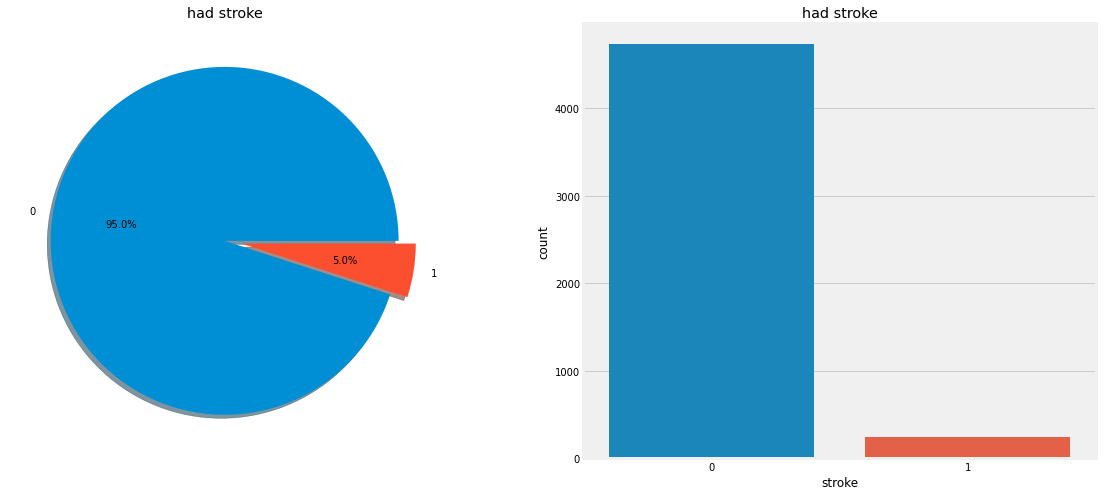

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['stroke'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('had stroke')
ax[0].set_ylabel('')
sns.countplot('stroke',data=data,ax=ax[1])
ax[1].set_title('had stroke')
plt.show()

### Categorical Feature : Gender

In [9]:
data.groupby(['gender','stroke'])['stroke'].count()

gender  stroke
Female  0         2767
        1          140
Male    0         1966
        1          108
Name: stroke, dtype: int64

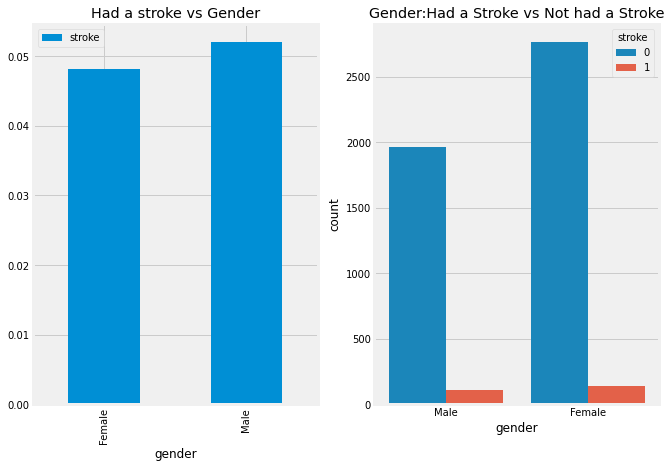

In [10]:
f,ax=plt.subplots(1,2,figsize=(10,7))
data[['gender','stroke']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Had a stroke vs Gender')
sns.countplot('gender',hue='stroke',data=data,ax=ax[1])
ax[1].set_title('Gender:Had a Stroke vs Not had a Stroke')
plt.show()

It seems that male and female population that had a stroke before in the data is balanced (not totally but there is no big difference). It also can be seen that very less people for both genders had a stroke.

### Categorical Feature: Hypertansion

In [11]:
data.groupby(['hypertension','stroke'])['stroke'].count()

hypertension  stroke
0             0         4320
              1          182
1             0          413
              1           66
Name: stroke, dtype: int64

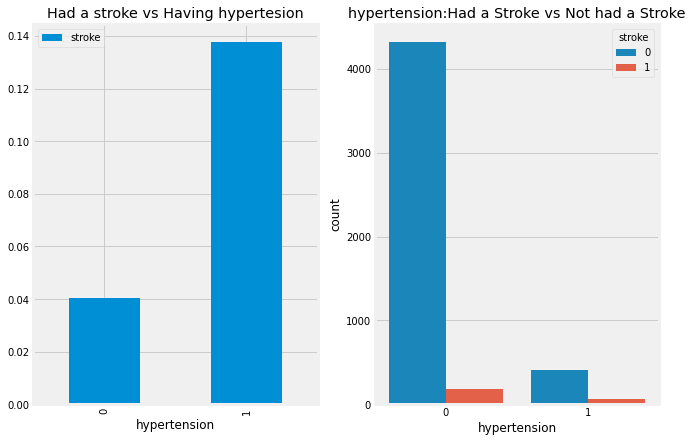

In [12]:
f,ax=plt.subplots(1,2,figsize=(10,7))
data[['hypertension','stroke']].groupby(['hypertension']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Had a stroke vs Having hypertesion')
sns.countplot('hypertension',hue='stroke',data=data,ax=ax[1])
ax[1].set_title('hypertension:Had a Stroke vs Not had a Stroke')
plt.show()

So if we look at the visualization, in case of having hypertansion or not a very similar rate of stroke appears.

### Categorical Feature : Heart Disease

In [13]:
data.groupby(['heart_disease','stroke'])['stroke'].count()

heart_disease  stroke
0              0         4505
               1          201
1              0          228
               1           47
Name: stroke, dtype: int64

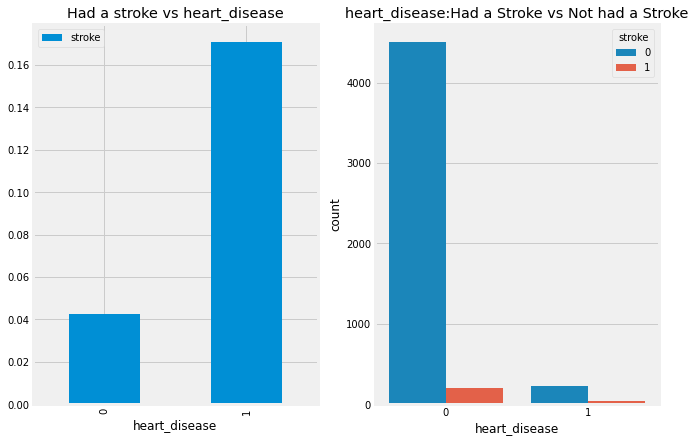

In [14]:
f,ax=plt.subplots(1,2,figsize=(10,7))
data[['heart_disease','stroke']].groupby(['heart_disease']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Had a stroke vs heart_disease')
sns.countplot('heart_disease',hue='stroke',data=data,ax=ax[1])
ax[1].set_title('heart_disease:Had a Stroke vs Not had a Stroke')
plt.show()

### Ordinal Feature : Smoking Status

In [15]:
pd.crosstab(data.smoking_status,data.stroke,margins=True).style.background_gradient(cmap='summer_r')

stroke,0,1,All
smoking_status,,,
Unknown,1453,47,1500
formerly smoked,797,70,867
never smoked,1749,89,1838
smokes,734,42,776
All,4733,248,4981


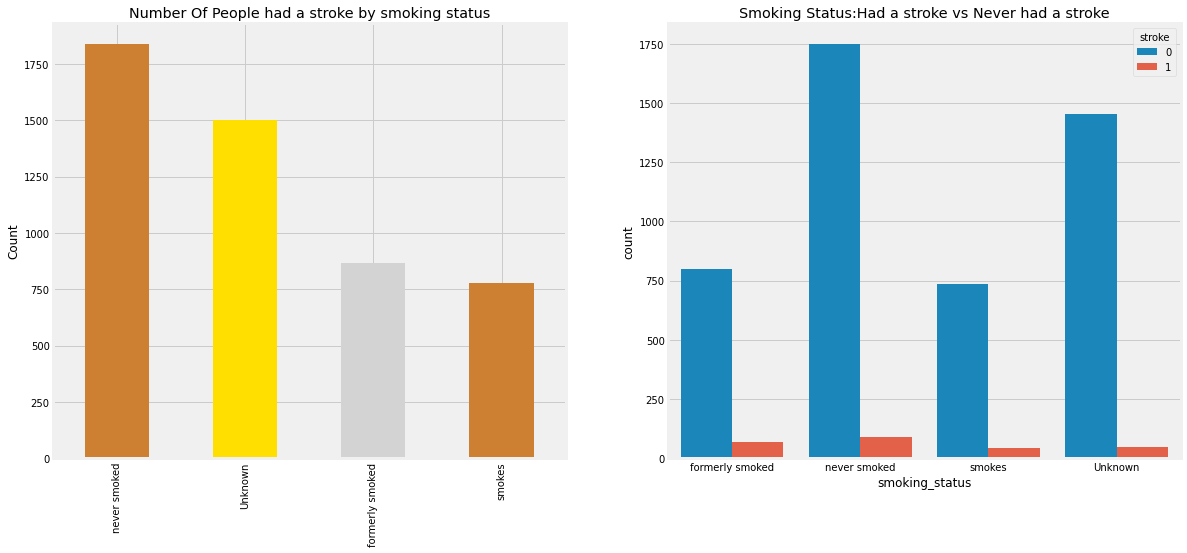

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['smoking_status'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of People had a stroke by smoking status')
ax[0].set_ylabel('Count')
sns.countplot('smoking_status',hue='stroke',data=data,ax=ax[1])
ax[1].set_title('Smoking Status:Had a stroke vs Never had a stroke')
plt.show()

 #### Let's also check the relationship between the gender and smoking status on stroke

In [17]:
pd.crosstab([data.gender,data.stroke],data.smoking_status,margins=True).style.background_gradient(cmap='summer_r')

<Figure size 1080x576 with 0 Axes>

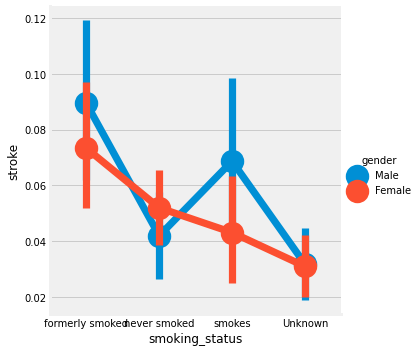

In [18]:
plt.figure(figsize = (15,8))
sns.factorplot('smoking_status','stroke',hue='gender',data=data)
plt.show()

### Continous Feature: Age

In [19]:
print('Oldest Person was of:',data['age'].max(),'Years')
print('Youngest Person was of:',data['age'].min(),'Years')
print('Average Age in the data:',data['age'].mean(),'Years')

Oldest Person was of: 82.0 Years
Youngest Person was of: 0.08 Years
Average Age in the data: 43.41985946597069 Years


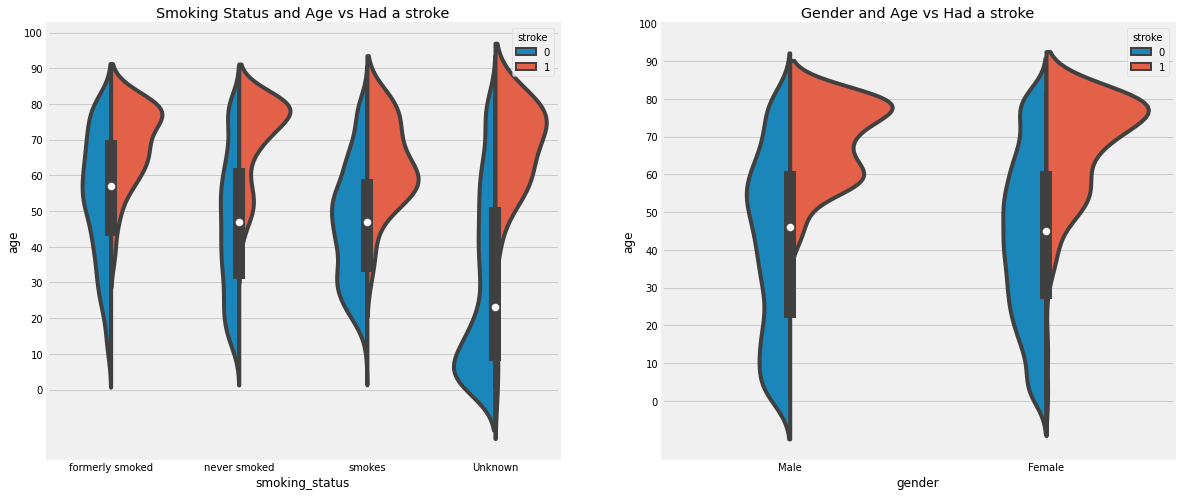

In [20]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("smoking_status","age", hue="stroke", data=data,split=True,ax=ax[0])
ax[0].set_title('Smoking Status and Age vs Had a stroke')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("gender","age", hue="stroke", data=data,split=True,ax=ax[1])
ax[1].set_title('Gender and Age vs Had a stroke')
ax[1].set_yticks(range(0,110,10))
plt.show()

##### It can be seen that if the age increases, the chance of having stroke increases too. For both features smoking_status and gender above 40 years old people have a high chance of having a stroke. It seems like most people had a stroke at the age of 80.

### Continious Features: Average Glucose Level and BMI (Body Mass Index)

In [21]:
print('Maximum "Average Glucose Level" in data:',data['avg_glucose_level'].max())
print('Minimum "Average Glucose Level" in data:',data['avg_glucose_level'].min())
print('Average "Average Glucose Level" in data:',data['avg_glucose_level'].mean())
print("***************************************")
print('Maximum "BMI" in data:',data['bmi'].max())
print('Minimum "BMI" in data:',data['bmi'].min())
print('Average "BMI" in data:',data['bmi'].mean())

Maximum "Average Glucose Level" in data: 271.74
Minimum "Average Glucose Level" in data: 55.12
Average "Average Glucose Level" in data: 105.94356153382854
***************************************
Maximum "BMI" in data: 48.9
Minimum "BMI" in data: 14.0
Average "BMI" in data: 28.498173057618956


Lets see the density of smoke status on the average glucose level in graphs

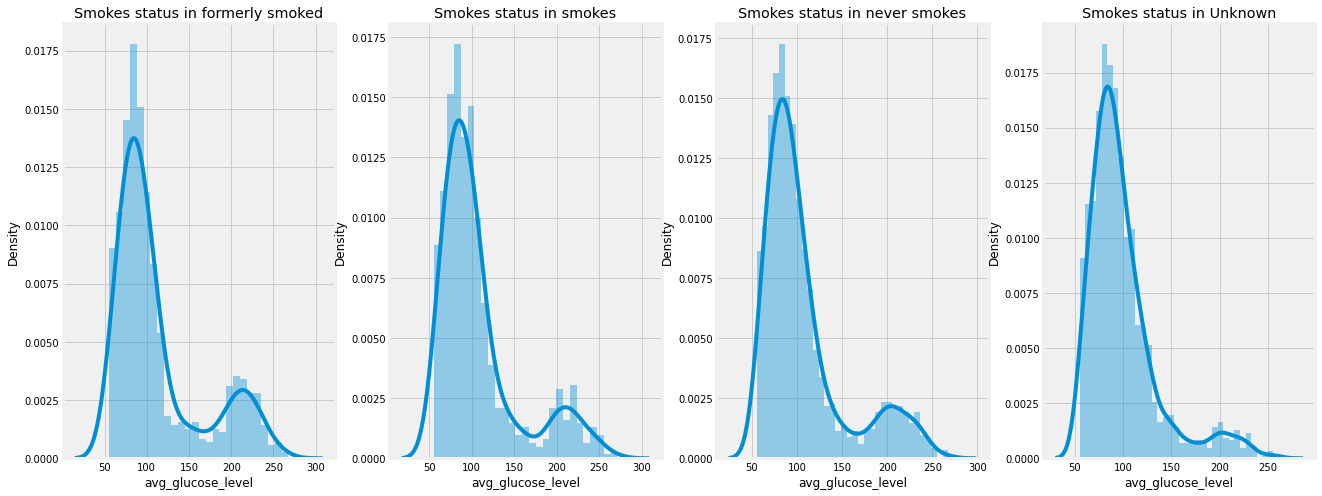

In [22]:
f,ax=plt.subplots(1,4,figsize=(20,8))
sns.distplot(data[data['smoking_status']=="formerly smoked"].avg_glucose_level,ax=ax[0])
ax[0].set_title('Smokes status in formerly smoked')
sns.distplot(data[data['smoking_status']=="smokes"].avg_glucose_level,ax=ax[1])
ax[1].set_title('Smokes status in smokes')
sns.distplot(data[data['smoking_status']== "never smoked"].avg_glucose_level,ax=ax[2])
ax[2].set_title('Smokes status in never smokes')
sns.distplot(data[data['smoking_status']== "Unknown"].avg_glucose_level,ax=ax[3])
ax[3].set_title('Smokes status in Unknown')
plt.show()

##### What about correlation matrix? Which features are more related with each other and the label

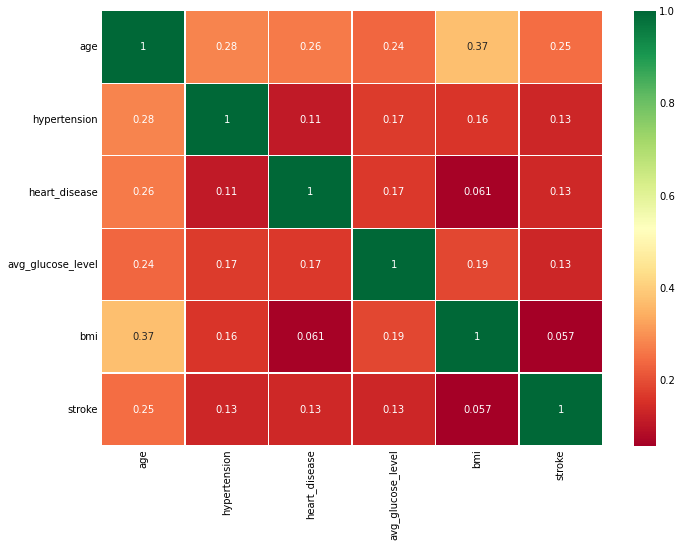

In [23]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

##### It seems BMI is not related much with the label but we can still keep you may drop that column as we did before.

In [24]:
data['age_band']=0
data.loc[data['age']<=16,'age_band']=0
data.loc[(data['age']>16)&(data['age']<=32),'age_band']=1
data.loc[(data['age']>32)&(data['age']<=48),'age_band']=2
data.loc[(data['age']>48)&(data['age']<=64),'age_band']=3
data.loc[data['age']>64,'age_band']=4

## 2. Feature Engineering and Data Cleaning

We need to convert the continous values into categorical values by either Binning or Normalisation. Binning and normalisation both will be used in this section i.e group a range of ages into a single bin or assign them a single value.

In [25]:
data['age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of people in each band

,age_band
3,1229
2,1067
4,1020
1,895
0,770


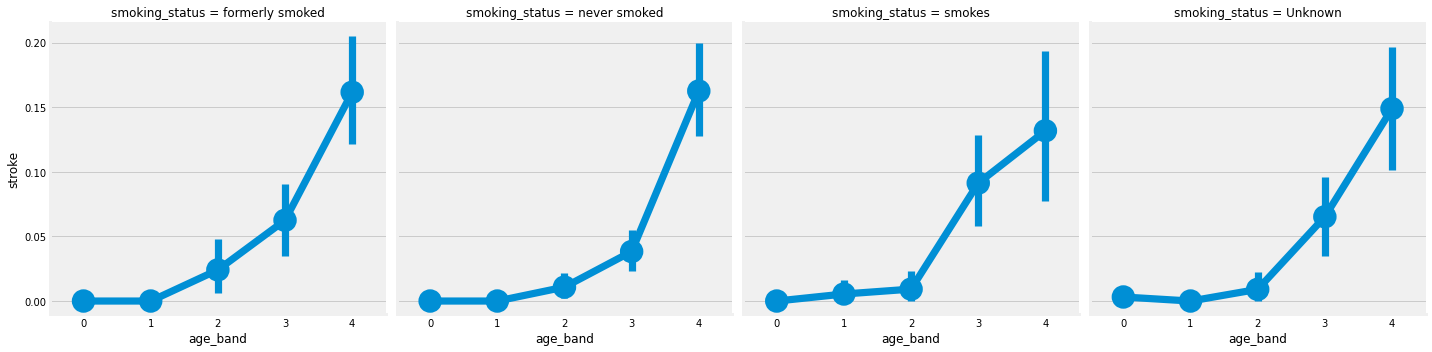

In [26]:
sns.factorplot('age_band','stroke',data=data,col='smoking_status')
plt.show()

##### For all smoking status options there is an increase in stroke while age_band increasing. Let's normalize the continious features "average glucose level" and "bmi".

In [27]:

# copy the data
data = data.copy()
  
# apply normalization techniques on Columns
column = 'avg_glucose_level'
column2 = 'bmi'
data[column] = data[column] /data[column].abs().max()
data[column2] = data[column2] /data[column2].abs().max()
  
# view normalized data
display(data.head())

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,age_band
0,Male,67.0,0,1,0.841577,0.748466,formerly smoked,1,4
1,Male,80.0,0,1,0.389784,0.664622,never smoked,1,4
2,Female,49.0,0,0,0.630124,0.703476,smokes,1,3
3,Female,79.0,1,0,0.640760,0.490798,never smoked,1,4
4,Male,81.0,0,0,0.685251,0.593047,formerly smoked,1,4


##### We also need to conver string variables to numeric variables. So, we need to work on smoking_status and gender too.

In [28]:
data['gender'].replace(['Male','Female'],[0,1],inplace=True)
data['gender'].head()

0    0
1    0
2    1
3    1
4    0
Name: gender, dtype: int64

In [29]:
data["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [30]:
data['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],[0,1,2,3],inplace=True)
data['smoking_status'].head()

0    0
1    1
2    2
3    1
4    0
Name: smoking_status, dtype: int64

## 3. Predictive Modelling

In [31]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

##### Splitting the data into test and train sets

In [32]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['stroke'])
train_X=train[train.columns[:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:-1]]
test_Y=test[test.columns[-1:]]
X=data[data.columns[:-1]]
Y=data['stroke']
len(train_X), len(train_Y), len(test_X), len(test_Y)

(3486, 3486, 1495, 1495)

#### Radial Support Vector Machines(rbf-SVM)

In [33]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  1.0


#### Linear Support Vector Machine(linear-SVM)

In [34]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 1.0


#### Logistic Regression

In [35]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8387959866220736


#### Decision Tree 

In [36]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 1.0


#### K-Nearest Neighbours(KNN)

In [37]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 1.0


#### Gaussian Naive Bayes

In [38]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8274247491638796


#### Random Forests

In [39]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 1.0


### Cross Validation

In [40]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,1.000000,0.000000
Radial Svm,0.950285,0.124694
Logistic Regression,0.999800,0.000601
KNN,0.952092,0.124368
Decision Tree,1.000000,0.000000
Naive Bayes,1.000000,0.000000
Random Forest,1.000000,0.000000


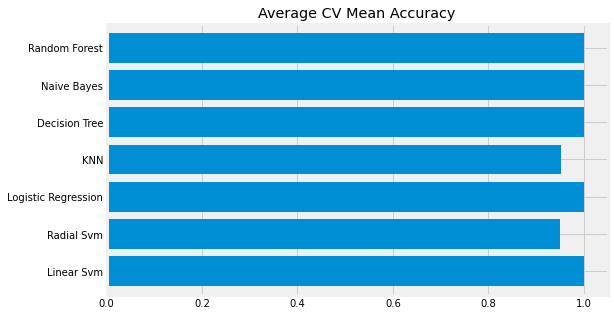

In [41]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

#### Great, Lets see the confusion matrixes for each algorithm

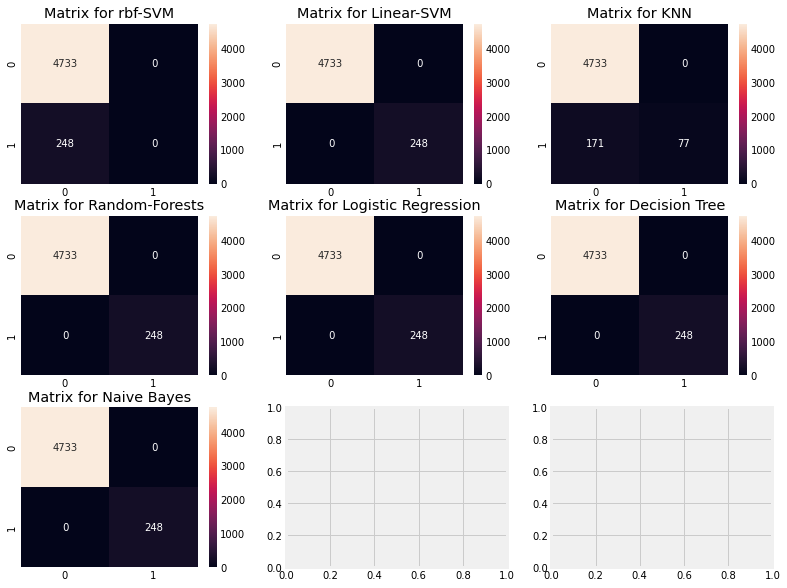

In [42]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### Ensembling

##### Ensembling is a great method to increase the performance of a model. Actually, It is the combination of several simple models to create a single powerful model. We already got the 100% accuracy for some models but it is just to see the ensembling

In [43]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 1.0
The cross validated score is 1.0


#### Boosting

##### It is also an ensembling technique that we will be applying some boosting algorithms like Ada, Gradient and XGBoost in this section

In [44]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 1.0


In [45]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 1.0


In [46]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 1.0
